<a href="https://colab.research.google.com/github/jshivamds272/Case-Study-On-Classification/blob/main/Case_Study_on_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix


In [ ]:
from google.colab import files
uploaded=files.upload()

Saving income(1).csv to income(1).csv


In [ ]:
import io
data_income=pd.read_csv(io.BytesIO(uploaded[r"income(1).csv"]))


In [ ]:
data=data_income.copy()


In [ ]:
print(data.info())  #to check datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31978 entries, 0 to 31977
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            31978 non-null  int64 
 1   JobType        31978 non-null  object
 2   EdType         31978 non-null  object
 3   maritalstatus  31978 non-null  object
 4   occupation     31978 non-null  object
 5   relationship   31978 non-null  object
 6   race           31978 non-null  object
 7   gender         31978 non-null  object
 8   capitalgain    31978 non-null  int64 
 9   capitalloss    31978 non-null  int64 
 10  hoursperweek   31978 non-null  int64 
 11  nativecountry  31978 non-null  object
 12  SalStat        31978 non-null  object
dtypes: int64(4), object(9)
memory usage: 3.2+ MB
None


In [ ]:
print(data.isnull().sum())  #no missing values


age              0
JobType          0
EdType           0
maritalstatus    0
occupation       0
relationship     0
race             0
gender           0
capitalgain      0
capitalloss      0
hoursperweek     0
nativecountry    0
SalStat          0
dtype: int64


In [ ]:
#summary of data
print(data.describe())  #numerical data
print(data.describe(include='object')) #categorical data


                age   capitalgain   capitalloss  hoursperweek
count  31978.000000  31978.000000  31978.000000  31978.000000
mean      38.579023   1064.360623     86.739352     40.417850
std       13.662085   7298.596271    401.594301     12.345285
min       17.000000      0.000000      0.000000      1.000000
25%       28.000000      0.000000      0.000000     40.000000
50%       37.000000      0.000000      0.000000     40.000000
75%       48.000000      0.000000      0.000000     45.000000
max       90.000000  99999.000000   4356.000000     99.000000
         JobType    EdType  ...   nativecountry                        SalStat
count      31978     31978  ...           31978                          31978
unique         9        16  ...              41                              2
top      Private   HS-grad  ...   United-States   less than or equal to 50,000
freq       22286     10368  ...           29170                          24283

[4 rows x 9 columns]


In [ ]:
#frequency of each categories
print(data['JobType'].value_counts())
print(data['occupation'].value_counts())


 Private             22286
 Self-emp-not-inc     2499
 Local-gov            2067
 ?                    1809
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
 Never-worked            7
Name: JobType, dtype: int64
 Prof-specialty       4038
 Craft-repair         4030
 Exec-managerial      3992
 Adm-clerical         3721
 Sales                3584
 Other-service        3212
 Machine-op-inspct    1966
 ?                    1816
 Transport-moving     1572
 Handlers-cleaners    1350
 Farming-fishing       989
 Tech-support          912
 Protective-serv       644
 Priv-house-serv       143
 Armed-Forces            9
Name: occupation, dtype: int64


In [ ]:

#checking for unique value
print(np.unique(data['JobType']))
print(np.unique(data['occupation']))

[' ?' ' Federal-gov' ' Local-gov' ' Never-worked' ' Private'
 ' Self-emp-inc' ' Self-emp-not-inc' ' State-gov' ' Without-pay']
[' ?' ' Adm-clerical' ' Armed-Forces' ' Craft-repair' ' Exec-managerial'
 ' Farming-fishing' ' Handlers-cleaners' ' Machine-op-inspct'
 ' Other-service' ' Priv-house-serv' ' Prof-specialty' ' Protective-serv'
 ' Sales' ' Tech-support' ' Transport-moving']


In [ ]:
#again go back and data by including "na_values['?']---
data=pd.read_csv(io.BytesIO(uploaded[r"income(1).csv"]),na_values=[' ?'])


In [ ]:
#data preprocessing
print(data.isnull().sum())

 

age                 0
JobType          1809
EdType              0
maritalstatus       0
occupation       1816
relationship        0
race                0
gender              0
capitalgain         0
capitalloss         0
hoursperweek        0
nativecountry       0
SalStat             0
dtype: int64


In [ ]:
missing=data[data.isnull().any(axis=1)]
#atleast one column value is missing
""" missing values in job type=1809
    missing values in occupation=1816
    1816-1809=7 --we still have occupation unifilled for 
    these 7 rows because jobtype is never worked
    """
    

' missing values in job type=1809\n    missing values in occupation=1816\n    1816-1809=7 --we still have occupation unifilled for \n    these 7 rows because jobtype is never worked\n    '

In [ ]:
data2=data.dropna(axis=0)
#we have removed all missing values from any row

In [ ]:
correlation=data2.corr()
#no variables are correlated to each other 
#we will consider categorical variables for relationship

In [ ]:
#cross tables and data visualization
#extracting the column names

data2.columns


Index(['age', 'JobType', 'EdType', 'maritalstatus', 'occupation',
       'relationship', 'race', 'gender', 'capitalgain', 'capitalloss',
       'hoursperweek', 'nativecountry', 'SalStat'],
      dtype='object')

In [ ]:
#gender  proportion
gender=pd.crosstab(index=data2['gender'],columns='count',normalize=True) 
print(gender)

col_0       count
gender           
 Female  0.324315
 Male    0.675685


In [ ]:
gender_salastat=pd.crosstab(index=data2['gender'],columns=data2['SalStat'],margins=True,normalize='index')
print(gender_salastat)


SalStat   greater than 50,000   less than or equal to 50,000
gender                                                      
 Female              0.113678                       0.886322
 Male                0.313837                       0.686163
All                  0.248922                       0.751078


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


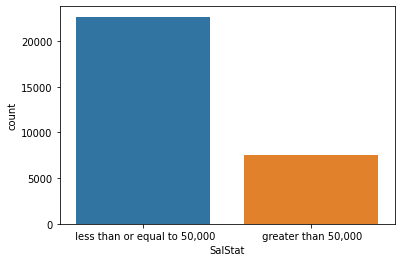

In [ ]:
#frequency distribution
SalStat=sns.countplot(data2['SalStat'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


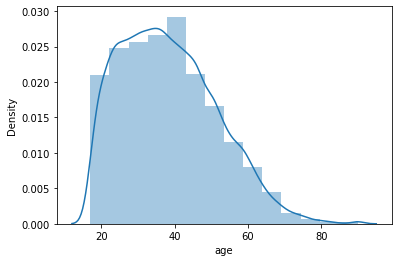

In [ ]:
#histogram of age

sns.distplot(data2['age'],bins=14,kde=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


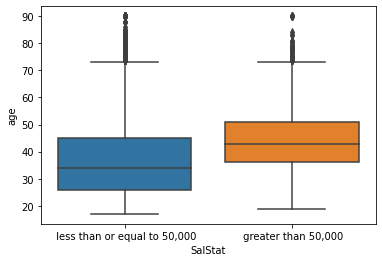

In [ ]:
#box plot -age vs salary status---

sns.boxplot('SalStat','age',data=data2)

In [ ]:
x1=data2.groupby('SalStat')['age'].median().to_frame()
x1

,age
SalStat,
"greater than 50,000",43
"less than or equal to 50,000",34


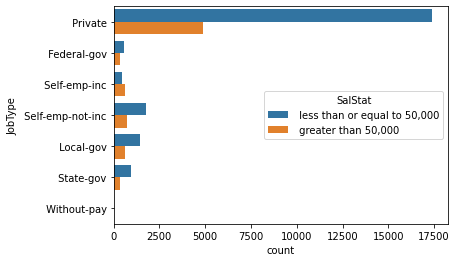

In [ ]:
 sns.countplot(y=data2['JobType'],hue=data2['SalStat'])

In [ ]:
pd.crosstab(index=data2['JobType'],columns=data2['SalStat'],margins=True,normalize='index')

SalStat,"greater than 50,000","less than or equal to 50,000"
JobType,,
Federal-gov,0.387063,0.612937
Local-gov,0.294630,0.705370
Private,0.218792,0.781208
Self-emp-inc,0.558659,0.441341
Self-emp-not-inc,0.285714,0.714286
State-gov,0.268960,0.731040
Without-pay,0.000000,1.000000
All,0.248922,0.751078


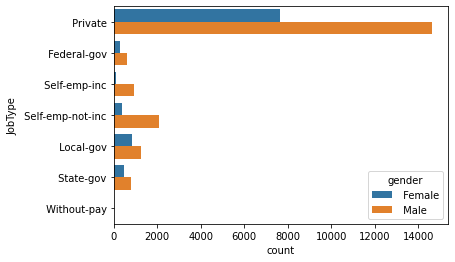

In [ ]:
#gender vs SalStat-----'
sns.countplot(y=data2['JobType'],hue=data2['gender'])

In [ ]:
pd.crosstab(index=data2['JobType'],columns=data2['gender'],normalize='index' )

gender,Female,Male
JobType,,
Federal-gov,0.327678,0.672322
Local-gov,0.398645,0.601355
Private,0.342906,0.657094
Self-emp-inc,0.117318,0.882682
Self-emp-not-inc,0.156863,0.843137
State-gov,0.378421,0.621579
Without-pay,0.357143,0.642857


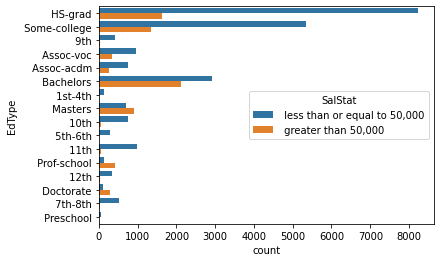

In [ ]:
#Education vs salary status
sns.countplot(y=data2['EdType'],hue=data2['SalStat'])

In [ ]:
pd.crosstab(index=data2['EdType'],columns=data2['SalStat'],margins=True,normalize='index')

SalStat,"greater than 50,000","less than or equal to 50,000"
EdType,,
10th,0.071951,0.928049
11th,0.056298,0.943702
12th,0.076923,0.923077
1st-4th,0.039735,0.960265
5th-6th,0.041667,0.958333
7th-8th,0.062837,0.937163
9th,0.054945,0.945055
Assoc-acdm,0.253968,0.746032
Assoc-voc,0.263198,0.736802


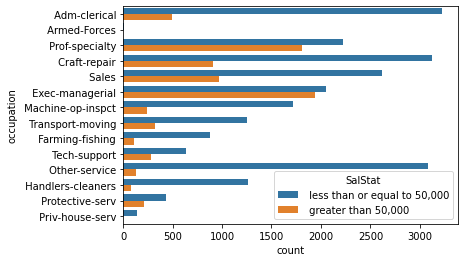

In [ ]:
#occupation vs SalStat
sns.countplot(y=data2['occupation'],hue=data2['SalStat'])

In [ ]:
pd.crosstab(index=data2['occupation'],columns=data2['SalStat'],margins=True,normalize='index')

SalStat,"greater than 50,000","less than or equal to 50,000"
occupation,,
Adm-clerical,0.133835,0.866165
Armed-Forces,0.111111,0.888889
Craft-repair,0.225310,0.774690
Exec-managerial,0.485220,0.514780
Farming-fishing,0.116279,0.883721
Handlers-cleaners,0.061481,0.938519
Machine-op-inspct,0.124619,0.875381
Other-service,0.041096,0.958904
Priv-house-serv,0.006993,0.993007


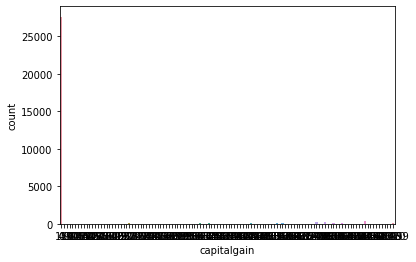

In [ ]:
sns.countplot(x='capitalgain',data=data2)

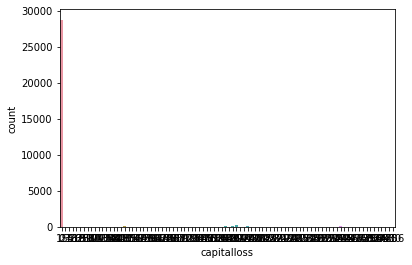

In [ ]:
sns.countplot(x='capitalloss',data=data2)

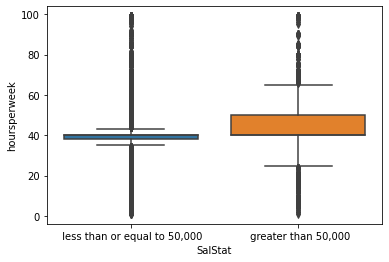

In [ ]:
#hours per week Vs salstat
sns.boxplot(y='hoursperweek',x='SalStat',data=data2)

In [ ]:
#we will build logistic regression model---
data2['SalStat']=data2['SalStat'].map({' less than or equal to 50,000':0,' greater than 50,000':1})
data2['SalStat']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0        0
1        0
2        1
3        0
4        0
        ..
31973    0
31974    0
31975    0
31976    0
31977    0
Name: SalStat, Length: 30162, dtype: int64

In [ ]:
new_data=pd.get_dummies(data2,drop_first=True)
new_data.head()

,age,capitalgain,capitalloss,hoursperweek,SalStat,JobType_ Local-gov,JobType_ Private,JobType_ Self-emp-inc,JobType_ Self-emp-not-inc,JobType_ State-gov,JobType_ Without-pay,EdType_ 11th,EdType_ 12th,EdType_ 1st-4th,EdType_ 5th-6th,EdType_ 7th-8th,EdType_ 9th,EdType_ Assoc-acdm,EdType_ Assoc-voc,EdType_ Bachelors,EdType_ Doctorate,EdType_ HS-grad,EdType_ Masters,EdType_ Preschool,EdType_ Prof-school,EdType_ Some-college,maritalstatus_ Married-AF-spouse,maritalstatus_ Married-civ-spouse,maritalstatus_ Married-spouse-absent,maritalstatus_ Never-married,maritalstatus_ Separated,maritalstatus_ Widowed,occupation_ Armed-Forces,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,...,nativecountry_ Canada,nativecountry_ China,nativecountry_ Columbia,nativecountry_ Cuba,nativecountry_ Dominican-Republic,nativecountry_ Ecuador,nativecountry_ El-Salvador,nativecountry_ England,nativecountry_ France,nativecountry_ Germany,nativecountry_ Greece,nativecountry_ Guatemala,nativecountry_ Haiti,nativecountry_ Holand-Netherlands,nativecountry_ Honduras,nativecountry_ Hong,nativecountry_ Hungary,nativecountry_ India,nativecountry_ Iran,nativecountry_ Ireland,nativecountry_ Italy,nativecountry_ Jamaica,nativecountry_ Japan,nativecountry_ Laos,nativecountry_ Mexico,nativecountry_ Nicaragua,nativecountry_ Outlying-US(Guam-USVI-etc),nativecountry_ Peru,nativecountry_ Philippines,nativecountry_ Poland,nativecountry_ Portugal,nativecountry_ Puerto-Rico,nativecountry_ Scotland,nativecountry_ South,nativecountry_ Taiwan,nativecountry_ Thailand,nativecountry_ Trinadad&Tobago,nativecountry_ United-States,nativecountry_ Vietnam,nativecountry_ Yugoslavia
0,45,0,0,28,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,24,0,0,40,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,44,0,0,40,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,27,0,0,40,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,20,0,0,35,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
#storing the columns
coloumns_list=list(new_data.columns)
coloumns_list

['age',
 'capitalgain',
 'capitalloss',
 'hoursperweek',
 'SalStat',
 'JobType_ Local-gov',
 'JobType_ Private',
 'JobType_ Self-emp-inc',
 'JobType_ Self-emp-not-inc',
 'JobType_ State-gov',
 'JobType_ Without-pay',
 'EdType_ 11th',
 'EdType_ 12th',
 'EdType_ 1st-4th',
 'EdType_ 5th-6th',
 'EdType_ 7th-8th',
 'EdType_ 9th',
 'EdType_ Assoc-acdm',
 'EdType_ Assoc-voc',
 'EdType_ Bachelors',
 'EdType_ Doctorate',
 'EdType_ HS-grad',
 'EdType_ Masters',
 'EdType_ Preschool',
 'EdType_ Prof-school',
 'EdType_ Some-college',
 'maritalstatus_ Married-AF-spouse',
 'maritalstatus_ Married-civ-spouse',
 'maritalstatus_ Married-spouse-absent',
 'maritalstatus_ Never-married',
 'maritalstatus_ Separated',
 'maritalstatus_ Widowed',
 'occupation_ Armed-Forces',
 'occupation_ Craft-repair',
 'occupation_ Exec-managerial',
 'occupation_ Farming-fishing',
 'occupation_ Handlers-cleaners',
 'occupation_ Machine-op-inspct',
 'occupation_ Other-service',
 'occupation_ Priv-house-serv',
 'occupation_ Pr

In [ ]:
#seperating the input names from data
features=list(set(coloumns_list)-set(['SalStat']))

In [ ]:
#storing the output values in y
y=new_data['SalStat'].values

In [ ]:
x=new_data[features].values

In [ ]:
#split the train and test data
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,random_state=0)

In [ ]:
#make an instance of the model
logistic=LogisticRegression()

In [ ]:
#fit the train model
logistic.fit(train_x,train_y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
logistic.coef_

array([[-7.24000346e-03,  1.45398569e-02, -5.75414489e-01,
        -3.27185782e-03, -3.36854227e-02, -3.33739785e-03,
        -6.14799314e-03,  2.33853253e-01, -7.40409015e-01,
        -2.44442135e-01, -4.24999137e-01, -3.85526099e-02,
         4.42570969e-04, -3.21685838e-01, -1.26310017e-03,
        -5.83582252e-02, -2.48016223e-01, -2.65432046e-02,
         9.04374134e-03, -7.16445146e-02,  1.17028194e-01,
         1.26930811e-02, -4.33716853e-01,  2.46265603e-01,
        -4.48893512e-03, -3.96559506e-02, -3.50520308e-01,
        -1.34711428e+00, -2.70403670e-03, -1.37303447e-02,
        -2.57447515e-01, -5.21421531e-04, -1.17910319e-01,
         8.97148217e-01, -2.02854112e-02,  2.48364135e-01,
         1.95301274e-03, -2.56981248e-02,  3.16697019e-04,
        -2.24346363e-02,  3.59419489e-03, -1.20781008e-02,
        -1.18260547e-02, -8.20361670e-03,  1.65011477e-02,
        -4.13600205e-02, -1.79326357e-01,  1.13270769e+00,
         5.70916707e-03,  9.80815467e-02, -2.17512649e-0

In [ ]:
logistic.intercept_

array([-1.04054052])

In [ ]:
#prediction from test data
prediction=logistic.predict(test_x)
prediction

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
confusion_matrix(test_y,prediction)

array([[6291,  532],
       [ 946, 1280]])

In [ ]:
accuracy_score(test_y,prediction)

0.8366670350314952

In [ ]:
#printing the misclassified values from prediction
print('misclassified sample :%d' %(test_y !=prediction).sum())

misclassified sample :1478


In [ ]:
#reindexing the salary status names to 0,1---
data2['SalStat']=data2['SalStat'].map({' less than or equal to 50,000':0,' greater than 50,000':1})
data2['SalStat']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0        0
1        0
2        1
3        0
4        0
        ..
31973    0
31974    0
31975    0
31976    0
31977    0
Name: SalStat, Length: 30162, dtype: int64

In [ ]:
cols=['gender','nativecountry','race','JobType']
new_data2=data2.drop(cols,axis=1)  #remove these col


In [ ]:
new_data2=pd.get_dummies(new_data2,drop_first=True)

In [ ]:
col=list(new_data2.columns)

In [ ]:
features=list(set(col)-set(['SalStat']))

In [ ]:
y=new_data2['SalStat'].values

In [ ]:
x=new_data[features].values

In [ ]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,random_state=0)

In [ ]:
logistic=LogisticRegression()

In [ ]:
logistic.fit(train_x,train_y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
pred=logistic.predict(test_x)

In [ ]:
confusion_matrix(test_y,prediction)

array([[6291,  532],
       [ 946, 1280]])

In [ ]:
accuracy_score(test_y,prediction)

0.8366670350314952